# Importing the Dependencies

In [6]:
# import the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

In [7]:
train = pd.read_csv('train.csv')

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

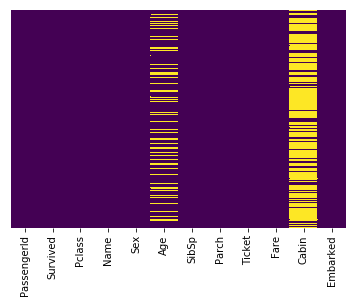

In [13]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

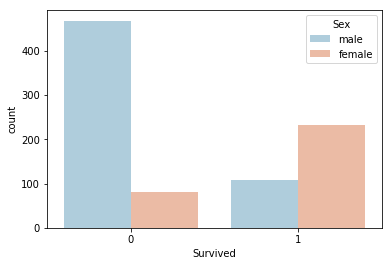

In [14]:
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

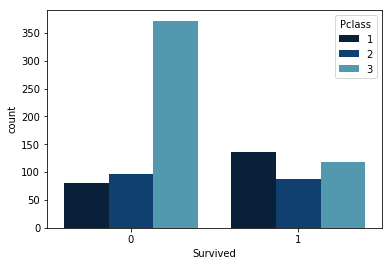

In [15]:
sns.countplot(x='Survived',data=train,hue='Pclass',palette = 'ocean')

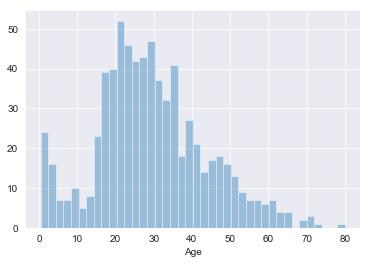

In [16]:
sns.set_style('darkgrid')
sns.distplot(train['Age'].dropna(),kde=False,bins=40)

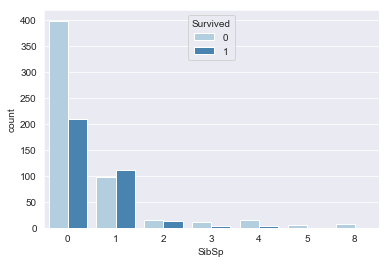

In [17]:
sns.countplot(x='SibSp',data=train,hue='Survived',palette='Blues')

C:\Users\abcd\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


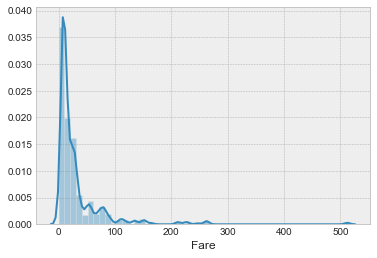

In [18]:
plt.style.use('bmh')
#train['Fare'].plot.hist()
sns.distplot(train['Fare'],bins=50)

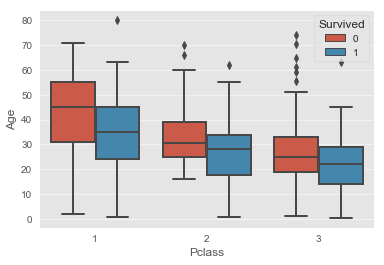

In [19]:
plt.style.use('ggplot')
sns.boxplot(x='Pclass',y='Age',data=train,hue='Survived')

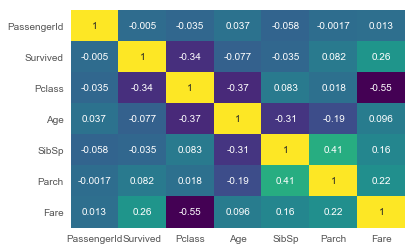

In [20]:
sns.heatmap(train.corr(),annot = True,cbar=False,cmap='viridis')

## Feature Engineering

In [21]:
def impute_age(col):
    age = col[0]
    Pclass = col[1]
    if pd.isnull(age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else :
            return 24
    else:
        return age

In [22]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

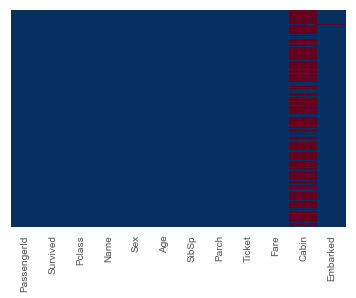

In [23]:
sns.heatmap(train.isnull(),cbar=False,yticklabels = False,cmap ='RdBu_r')

In [24]:
# Gives the length of the name
train['Name_length'] = train['Name'].apply(len)

In [25]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_length'],
      dtype='object')

In [26]:
train['Sex'] = train['Sex'].apply(lambda x:0 if x == 'male' else 1)

In [27]:
train.drop('Cabin',axis = 1,inplace = True)

In [28]:
train.dropna(inplace = True)

In [29]:
train.shape

(889, 12)

In [30]:
pd.crosstab([train.Pclass,train.Sex],train.Survived,margins=True)

Survived      0    1  All
Pclass Sex               
1      0     77   45  122
       1      3   89   92
2      0     91   17  108
       1      6   70   76
3      0    300   47  347
       1     72   72  144
All         549  340  889

In [31]:
print('Oldest Passenger was of:',train['Age'].max(),'Years')
print('Youngest Passenger was of:',train['Age'].min(),'Years')
print('Average Age on the ship:',train['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.019313835770525 Years


C:\Users\abcd\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


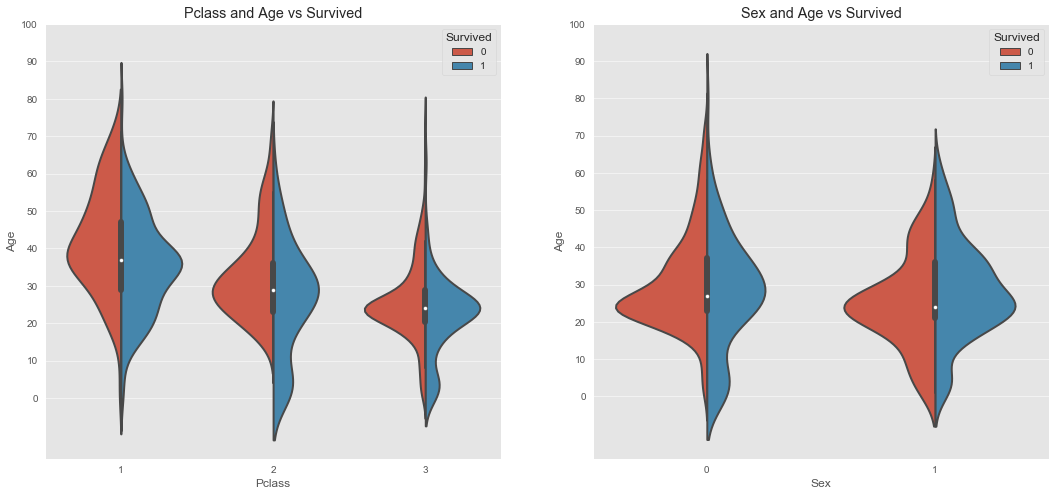

In [32]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [33]:
pd.crosstab([train.Embarked,train.Pclass],[train.Sex,train.Survived],margins=True).style.background_gradient(cmap='summer_r')

In [34]:
 train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [35]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Name_length', 'FamilySize'],
      dtype='object')

In [36]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [37]:
train = pd.concat([train,embark],axis =1)

In [38]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_length,FamilySize,Q,S
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.00,S,21,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.00,S,28,1,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,24.0,1,2,W./C. 6607,23.45,S,40,4,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.00,C,21,1,0,0
890,891,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,370376,7.75,Q,19,1,1,0


In [39]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Name_length', 'FamilySize', 'Q',
       'S'],
      dtype='object')

In [40]:
X_train = train.drop(['PassengerId','Survived','Name', 'Ticket','Embarked'],axis =1)

In [41]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_length',
       'FamilySize', 'Q', 'S'],
      dtype='object')

In [42]:
y_train = train['Survived']

# EDA on test Data 

In [43]:
test = pd.read_csv('test.csv')

In [44]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [46]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


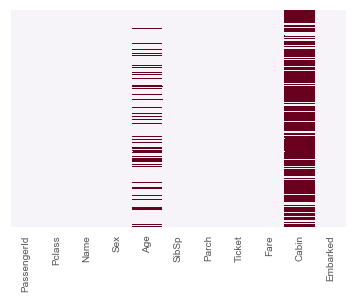

In [47]:
sns.heatmap(test.isnull(),cbar=False,yticklabels = False,cmap='PuRd')

In [53]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis = 1)

In [54]:
test['Name_length'] = test['Name'].apply(len)

In [55]:
test['Sex'] = test['Sex'].apply(lambda x:0 if x == 'male' else 1)

In [56]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [57]:
embark = pd.get_dummies(test['Embarked'],drop_first = True)

In [58]:
test = pd.concat([test,embark],axis =1)

In [59]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,FamilySize,Q,S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,16,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,32,2,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,25,1,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,16,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,44,3,0,1


In [142]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_length', 'FamilySize', 'Q',
       'S'],
      dtype='object')

In [177]:
test.shape

(418, 15)

In [60]:
X_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
        'Fare', 'Name_length', 'FamilySize', 'Q',
       'S']]

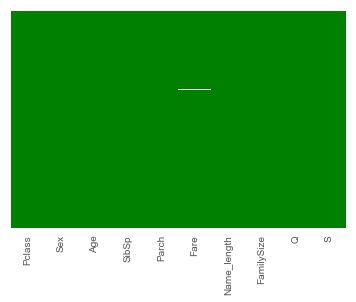

In [61]:
sns.heatmap(X_test.isnull(),yticklabels =False,cbar = False,cmap = 'ocean')

In [62]:
X_test['Fare']  = X_test['Fare'].fillna(X_test['Fare'].mean())

C:\Users\abcd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
X_test.shape

(418, 10)

# Validation Data

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [66]:
print("Shape of the training dataset : ",X_train.shape)
print("Shape of the training dataset : ",X_val.shape)

Shape of the training dataset :  (622, 10)
Shape of the training dataset :  (267, 10)


# Defining the model

In [67]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression

In [73]:
# Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
prediction = model.predict(X_val)

In [89]:
logmodel.coef_

array([[-0.95014031,  2.28955625, -0.04666026, -0.65627914, -0.33430341,
         0.00398383,  0.05035282,  0.18853233, -0.14789909, -0.53419688]])

In [81]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_length',
       'FamilySize', 'Q', 'S'],
      dtype='object')

In [112]:
from sklearn.metrics import accuracy_score
acc_log = accuracy_score(y_val,prediction)
acc_log

0.8314606741573034

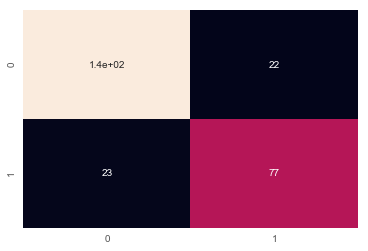

             precision    recall  f1-score   support

          0       0.86      0.87      0.87       167
          1       0.78      0.77      0.77       100

avg / total       0.83      0.83      0.83       267



In [71]:
from sklearn.metrics import classification_report,confusion_matrix
sns.heatmap(confusion_matrix(y_val,prediction),yticklabels=True,cbar=False,annot = True)
plt.show()
print(classification_report(y_val,prediction))

# Support Vector Machines

In [72]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_val)
acc_svc = accuracy_score(y_val,Y_pred)
acc_svc

0.6554307116104869

In [92]:
svc.intercept_

array([-0.07512665])

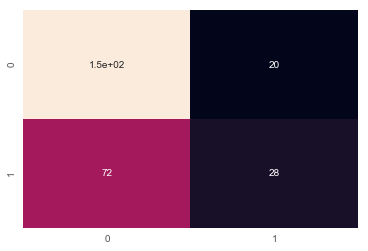

             precision    recall  f1-score   support

          0       0.67      0.88      0.76       167
          1       0.58      0.28      0.38       100

avg / total       0.64      0.66      0.62       267



In [93]:
from sklearn.metrics import classification_report,confusion_matrix
sns.heatmap(confusion_matrix(y_val,Y_pred),yticklabels=True,cbar=False,annot = True)
plt.show()
print(classification_report(y_val,Y_pred))

# KNN Model

In [94]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_val)
acc_knn = accuracy_score(y_val,Y_pred)
acc_knn

0.6966292134831461

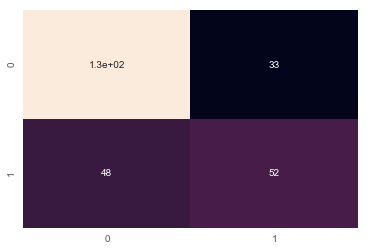

             precision    recall  f1-score   support

          0       0.74      0.80      0.77       167
          1       0.61      0.52      0.56       100

avg / total       0.69      0.70      0.69       267



In [97]:
sns.heatmap(confusion_matrix(y_val,Y_pred),yticklabels=True,cbar=False,annot = True)
plt.show()
print(classification_report(y_val,Y_pred))

# Perceptron algorithm

In [100]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_val)
acc_perceptron = accuracy_score(y_val,Y_pred)
acc_perceptron

C:\Users\abcd\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7453183520599251

In [101]:
perceptron.coef_

array([[-244.    ,  248.    ,  -68.58  , -203.    ,  -38.    ,   64.3715,
          53.    , -293.    ,   28.    , -130.    ]])

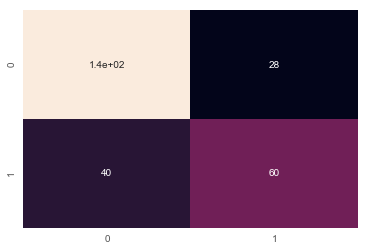

             precision    recall  f1-score   support

          0       0.78      0.83      0.80       167
          1       0.68      0.60      0.64       100

avg / total       0.74      0.75      0.74       267



In [105]:
sns.heatmap(confusion_matrix(y_val,Y_pred),yticklabels=True,cbar=False,annot = True)
plt.show()
print(classification_report(y_val,Y_pred))

# Decision Tress

In [106]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_val)
acc_decision_tree = accuracy_score(y_val,Y_pred)
acc_decision_tree

0.7415730337078652

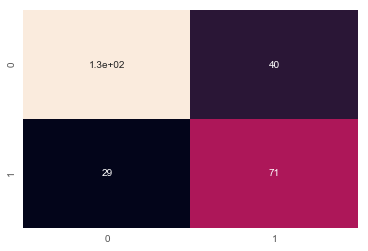

             precision    recall  f1-score   support

          0       0.81      0.76      0.79       167
          1       0.64      0.71      0.67       100

avg / total       0.75      0.74      0.74       267



In [107]:
sns.heatmap(confusion_matrix(y_val,Y_pred),yticklabels=True,cbar=False,annot = True)
plt.show()
print(classification_report(y_val,Y_pred))

# Random Forests

In [108]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_val)
random_forest.score(X_train, y_train)
acc_random_forest = accuracy_score(y_val,Y_pred)
acc_random_forest

0.7902621722846442

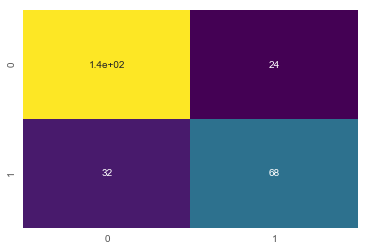

             precision    recall  f1-score   support

          0       0.82      0.86      0.84       167
          1       0.74      0.68      0.71       100

avg / total       0.79      0.79      0.79       267



In [109]:
sns.heatmap(confusion_matrix(y_val,Y_pred),yticklabels=True,cbar=False,annot = True,cmap='viridis')
plt.show()
print(classification_report(y_val,Y_pred))

# Evaluation

In [113]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN ', 'Logistic Regression', 
              'Random Forest', 'Perceptron','Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest,acc_perceptron,acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,0.831461
3,Random Forest,0.790262
4,Perceptron,0.745318
5,Decision Tree,0.741573
1,KNN,0.696629
0,Support Vector Machines,0.655431
